# RandomForest and GradientBoosting Models

#### Importing some libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

#### Importing to a dataframe
In this dataset, there is a column with number of shares that each articles has been shared. We are going to use the values in this column as a measure of popularity. Article which has been shared 1400 times or more is popular by our definition, and articles with less number of shares is unpopular.
The reason that we are using 1400 is that, the number of popular and unpopular articles with this definition will be equal and no subsequent downsizing or upsizing will be necessary.
Based on the priorities of our customers, and their definition of popularity in their business this number may vary and subsequent steps(upsampling or downsampling) would be necessary in order to balance the classes.

In [3]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df['popular'] = [1 if x >= 1400 else 0 for x in df[' shares']]
df.drop([' shares','url'], axis =1, inplace=True)

In [4]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popular
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [5]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

#### Splitting into train, test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

#### Instantiating RandomForestClassifier and fitting training set and predicting test set

In [7]:
rf = RandomForestClassifier(n_estimators =100, max_depth=4, max_features = 30,random_state=0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [8]:
print(f"log_loss of RandomForest model:{log_loss(y_test, rf.predict_proba(X_test))}") 
print(f"accuracy of RandomForest model:{accuracy_score(y_test, pred)}")

log_loss of RandomForest model:0.6316258078226797
accuracy of RandomForest model:0.6509974776427425


#### Plotting ROC curve for this model

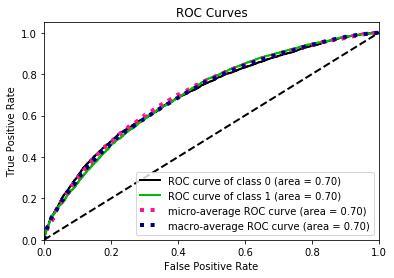

In [9]:
skplt.metrics.plot_roc(y_test, rf.predict_proba(X_test));

#### We could write a function to change the 1400 number and see what happens if we have unbalanced classes and we don't downsize or upsize them. As you can see, the more unbalanced the classes are the more accuracy we get for the models but we should be mindful of this since accuracy wouldn't be the best measure of classification performance with unbalnced classes.

In [7]:
def split_by_num_shares_randomForest(n):
    df = pd.read_csv('OnlineNewsPopularity.csv')
    df['popular'] = [1 if x >= n else 0 for x in df[' shares']]
    df.drop([' shares','url'], axis =1, inplace=True)
    X = df.iloc[:,0:-1].values
    y = df.iloc[:,-1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    rf = RandomForestClassifier(n_estimators =100, max_depth=4, max_features = 30,random_state=0)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    
    skplt.metrics.plot_roc(y_test, rf.predict_proba(X_test));
    return log_loss(y_test, rf.predict_proba(X_test)[:, 1]),rf.score(X_test, y_test)

[(0.6296500177767916, 0.6504624321638768),
 (0.6100687995963433, 0.6624627379041504),
 (0.5667708052828193, 0.7129098830543453),
 (0.51764470803253, 0.7579301383474738),
 (0.47410735098047874, 0.7921730489948788),
 (0.42897118292007047, 0.8250401284109149),
 (0.3960474915088895, 0.848811434686234),
 (0.36583931347193016, 0.8658564549415272),
 (0.346465595463099, 0.8767866697240694),
 (0.32040872680368593, 0.891156462585034)]

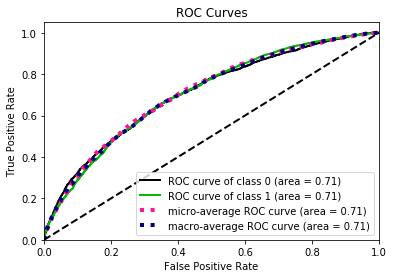

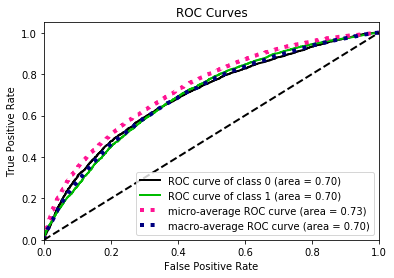

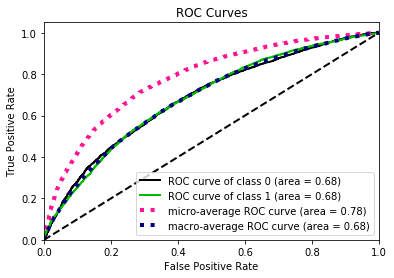

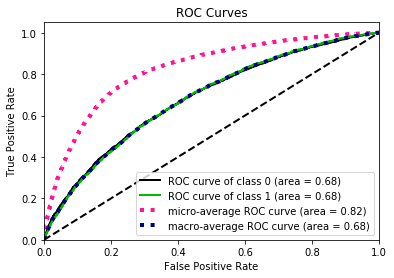

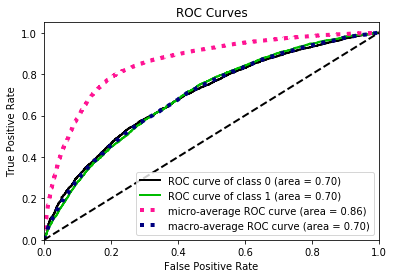

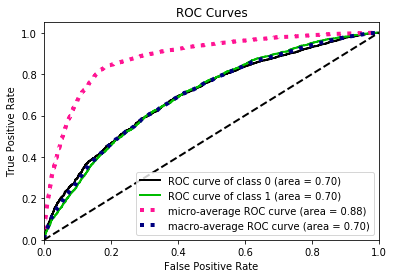

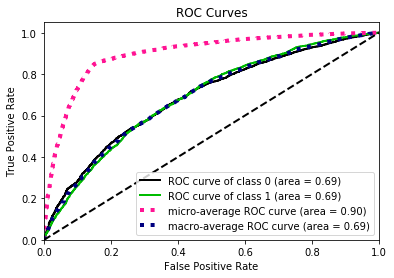

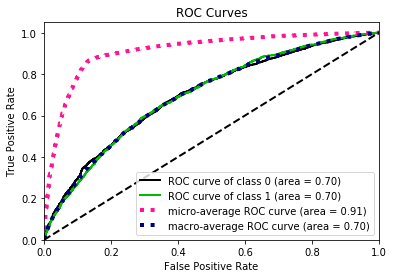

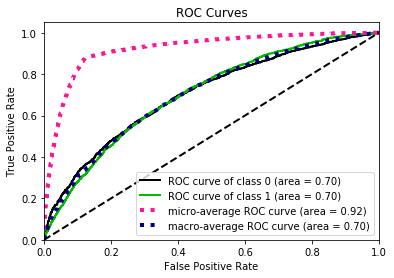

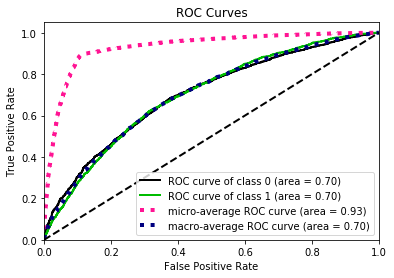

In [6]:
[split_by_num_shares_randomForest(n) for n in range(1400,6001,500)]

[(0.3073263419557309, 0.8961247420316442),
 (0.29979861744775566, 0.9013223266834823),
 (0.2759619261224491, 0.9118703661239776),
 (0.2646334761317266, 0.9176029962546817),
 (0.2414649109878778, 0.9279217304899487)]

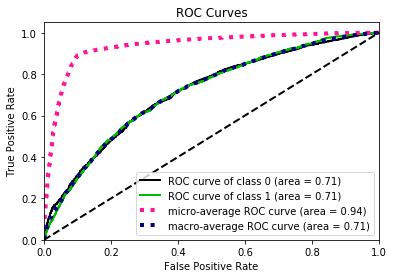

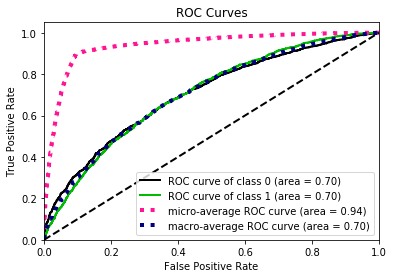

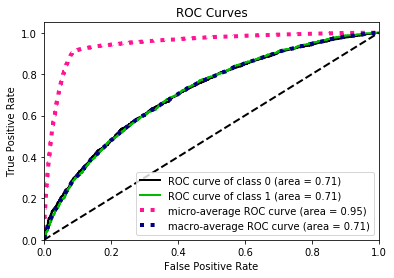

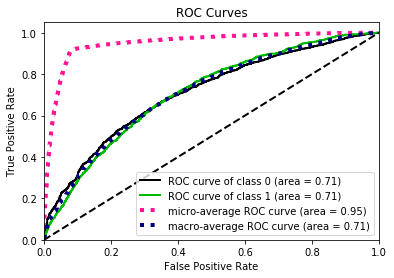

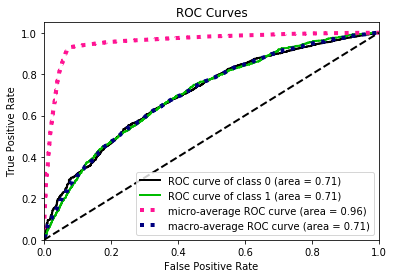

In [7]:
[split_by_num_shares_randomForest(n) for n in range(6000,8001,500)]

#### Instantiating GradientBoostingClassifier and fitting training set and predicting test set

In [42]:
gbc = GradientBoostingClassifier(learning_rate=0.01, 
                                   n_estimators= 1000, 
                                   min_samples_leaf=10)
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)

In [44]:
print(f"log_loss of GradientBoosting model:{log_loss(y_test, rf.predict_proba(X_test))}") 
print(f"accuracy of GradientBoosting model:{accuracy_score(y_test, pred)}")

log_loss of GradientBoosting model:0.6331101845213712
accuracy of GradientBoosting model:0.6723992967973706


#### We can do the same thing with this GradientBoosting model and see the same effect that in more unbalanced classes accuracy goes up but it is not a good measure of classification performance.

In [9]:
def split_by_num_shares_GBC(n):
    new_df = pd.read_csv('OnlineNewsPopularity.csv')
    new_df['popular'] = [1 if x >= n else 0 for x in new_df[' shares']]
    new_df.drop([' shares','url'], axis =1, inplace=True)
    X = new_df.iloc[:,0:-1].values
    y = new_df.iloc[:,-1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    gbc = GradientBoostingClassifier(learning_rate=0.01, 
                                   n_estimators= 1000, 
                                   min_samples_leaf=10)
    gbc.fit(X_train, y_train)
    pred = gbc.predict(X_test)
    
    skplt.metrics.plot_roc(y_test, gbc.predict_proba(X_test));
    return log_loss(y_test, gbc.predict_proba(X_test)[:, 1]),gbc.score(X_test, y_test)

(0.6003322685365088, 0.675838874875793)

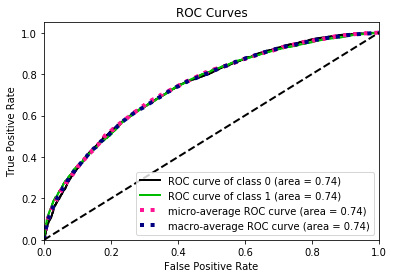

In [10]:
split_by_num_shares_GBC(1400)

(0.3016473903898685, 0.8971948329893755)

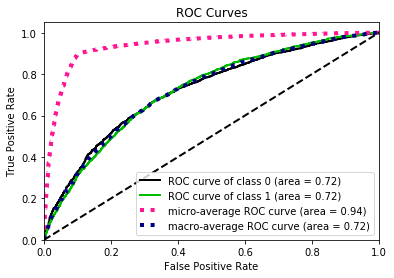

In [11]:
split_by_num_shares_GBC(6000)

#### Here, I have tried to make the same models with different feautures, for example I have made a model with only days which articles have been published. As you can see in the result, models are note performing better. 

In [45]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [46]:
df_only_days = df.iloc[:,[31,32,33,34,35,36,37,38,-1]]

In [47]:
df_only_days

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,711
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505
...,...,...,...,...,...,...,...,...,...
39639,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1800
39640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900
39641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900
39642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1100


In [48]:
df_only_days['popular'] = [1 if x >= 1400 else 0 for x in df_only_days[' shares']]
df_only_days.drop([' shares'], axis =1, inplace=True)
X = df_only_days.iloc[:,0:-1].values
y = df_only_days.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    

/home/farzady/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/farzady/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
gbc = GradientBoostingClassifier(learning_rate=0.01, 
                                   n_estimators= 1000, 
                                   min_samples_leaf=10)
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)

In [20]:
log_loss(y_test, gbc.predict_proba(X_test)[:, 1]),gbc.score(X_test, y_test)

(0.6788755960403818, 0.5420775051593671)

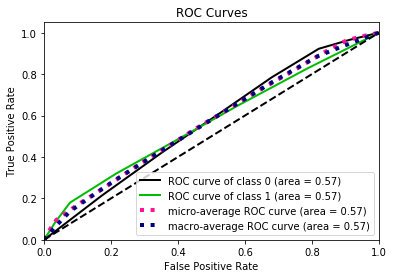

In [21]:
skplt.metrics.plot_roc(y_test, gbc.predict_proba(X_test));

In [49]:
model = GradientBoostingClassifier(learning_rate=0.01, 
                                   n_estimators= 1000, 
                                   min_samples_leaf=10)

In [50]:
model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
y_pred = model.predict(X_test)

In [52]:
model.score(X_test,y_test)

0.54047236872277

/home/farzady/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


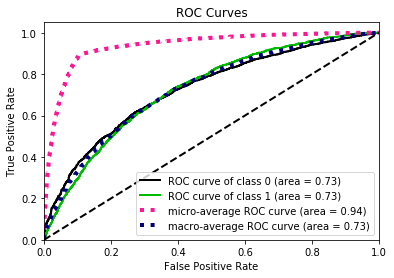

In [245]:
y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

#### Here, I have cut the original data to articles with number of shares below 2000, and defined the popular articles which have been shared more than 600 times. Again, this is just a testing of the classification performance and all definitions of popularity should be closely discussed and negotiated with the business client that we are working with.

In [273]:
cut_df = df[df[' shares'] < 2000]

In [274]:
cut_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [275]:
cut_df.shape

(25254, 61)

In [276]:
cut_df['popular'] = [1 if x >= 600 else 0 for x in cut_df[' shares']]

/home/farzady/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [277]:
new_df2 = cut_df.drop(['url',' shares'], axis = 1)

In [278]:
new_df2.shape

(25254, 60)

In [279]:
X = new_df2.iloc[:,0:-1].values
y = new_df2.iloc[:,-1].values

In [280]:
np.unique(y)

array([0, 1])

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [293]:
rf2 = RandomForestClassifier(n_estimators =1000, max_depth=4, max_features = 5,random_state=0,)
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [294]:
pred = rf2.predict(X_test)
print(f"log loss = {log_loss(y_test, rf2.predict_proba(X_test)[:, 1])}")
print(f"accuracy = {rf2.score(X_test, y_test)}")

log loss = 0.29022013106256184
accuracy = 0.9083273338132949


/home/farzady/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


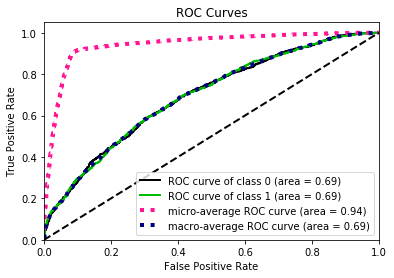

In [295]:
y_true = y_test
y_probas = rf2.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [297]:
model2 = GradientBoostingClassifier(learning_rate=0.01, 
                                   n_estimators= 1000, 
                                   min_samples_leaf=10)

In [298]:
model2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [301]:
y_pred = model2.predict(X_test)

In [302]:
model2.score(X_test,y_test)

0.9106071514278857

/home/farzady/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


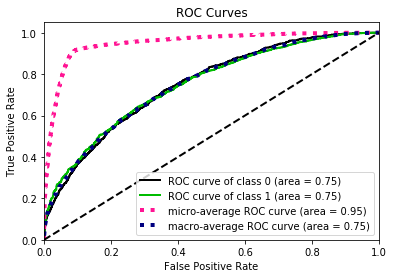

In [303]:
y_true = y_test
y_probas = model2.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()